2022-05-30

In [1]:
# %%
# Standard library imports
from datetime import datetime
import os
import os.path
import sys

# Third-party library imports
from natsort import natsorted, natsort_keygen
import numpy as np
import pandas as pd
from tqdm import tqdm

# Local application imports
#from ..NarrowBand.analysis_pd import df_processing as dfproc
# sys.path.insert(1, os.path.abspath('C:/Users/leofo/OneDrive - McGill University/Documents McGill/2019.2/LabTools Scripts/2021_12_03 Adaptations 15/'))
sys.path.insert(1, os.path.abspath('C:/Users/lforta/OneDrive - McGill University/Documents McGill/Github/nb-analysis-pandas/'))
import NarrowBand.align_signals.df_align_signals as dfal
from NarrowBand.analysis_pd import df_processing as dfproc
from NarrowBand.analysis_pd import df_compare as dfcomp
from NarrowBand.analysis_pd import df_declutter as dfdec
from NarrowBand.analysis_pd.safe_arange import safe_arange
from NarrowBand.nb_czt import czt as czt
from UWB.analysis_pd import uwb_df_processing as uwbproc

In [2]:
# %%
## USER INPUT SECTION

## Date for file selection:

date = "2020_09_18/"

## Main location path of Pandas DataFrame files (.parquet)

# main_path = "C:/Users/leofo/OneDrive - McGill University/Narrow Band Data1/PScope/"
# data_path = f"C:/Users/leofo/OneDrive - McGill University/Narrow Band Data1/PScope/{date}/Processed/DF 04/TD/{date} Phantom Set Means CZT TD.parquet"
data_path = f"C:/Users/lforta/OneDrive - McGill University/UWB Data Analysis/2020_01_24_IC_PG_Comparison_Phantoms/UWB_System_Picosecond/Phantom1/Tumor1/"

# Main location path of Pandas DataFrame files (.parquet)

# main_path = "C:/Users/leofo/OneDrive - McGill University/Narrow Band Data1/PScope/"

# Output path for post-processed files. Typically includes sub-folder for current date.

out_path = "C:/Users/lforta/OneDrive - McGill University/UWB Data Analysis/Outputs/{}/".format(datetime.now().strftime("%Y_%m_%d"))

## FFT Window Type ('hann', 'BlackmanHarris92', None, etc):
window_type = 'hann'

## Reference Pulse Parameters (in Hz):

fstep = 12.5e6 # frequency step in Hz (also used for CZT, should match scan data)
fmin = 2.0e9 # minimum frequency in Hz
fmax = 2.1e9 # minimum frequency in Hz
ref_mag = 1 # absolute magnitude of each frequency component

fscale = 1e6 # for CZT functions

## Target Time Array for Time Domain Signal:
#       A good choice is: safe_arange(0, 40e-9 + 5e-10, step = 5e-10)

target_time = safe_arange(0, 40e-9 + 5e-10, step = 5e-10)

In [3]:
# # # UWB Phantom Scan Data Read to Pandas

# scan = uwbproc.Scan_settings(phantom = 1, angle = 0, plug = 38, rep = 1, iter = 1, sampling_rate = 160e9, date = '2019-09-11', attRF = 0, HP_amp = 35, LNA_amp = 25, 
#                         sig_names = ['raw_transmission', 'raw_signal'], obs = '')

# df = uwbproc.uwb_data_read2pandas(data_path, out_path = out_path,
#                             processed_path = "Processed/DF/", settings = scan, save_file = True, save_format="parquet", parquet_engine= 'pyarrow',
#                             nafill = 0, keep_default_na = True, on_bad_lines = 'warn', out_df = True)


  0%|          | 0/240 [00:00<?, ?it/s]

 Saved DataFrame file for: 2019-09-11 Phantom 1 Angle 0 Plug 38 Rep 1 Iter 1          

In [4]:
# # UWB Phantom Scan Data Read to Pandas

read_path ='C:/Users/lforta/OneDrive - McGill University/UWB Data Analysis/Outputs/2022_05_28/Processed/DF/2019-09-11 Phantom 1 Angle 0 Plug 38 Rep 1 Iter 1.parquet'

# read_path ='C:/Users/leofo/OneDrive - McGill University/UWB Data Analysis/Outputs/2022_05_28/Processed/DF/2019-09-11 Phantom 1 Angle 0 Plug 38 Rep 1 Iter 1.parquet'

df = pd.read_parquet(read_path, engine = 'pyarrow')

# df['f_low'] = 1.7e9

In [5]:
df = dfproc.dfsort_pairs(df, sort_type = 'between_antennas', out_distances = True, out_as_list = False, narrowband = False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df2 = uwbproc.uwb_filter_signals(df, input_col_names = ['raw_signal'], output_col_names = ['signal'], start_pt = None, nSamples = 1000, detrend = True)

# file_title = f"{scan.date} Phantom {scan.phantom} Angle {scan.angle} Plug {scan.plug} Rep {scan.rep} Iter {scan.iter}"
# file_path = "".join((out_path, "Processed/DF Filtered 3/", file_title, ".parquet"))
# if not os.path.exists(os.path.dirname(file_path)):
#     os.makedirs(os.path.dirname(file_path))

# df2.to_parquet(file_path, engine='pyarrow', index= False)

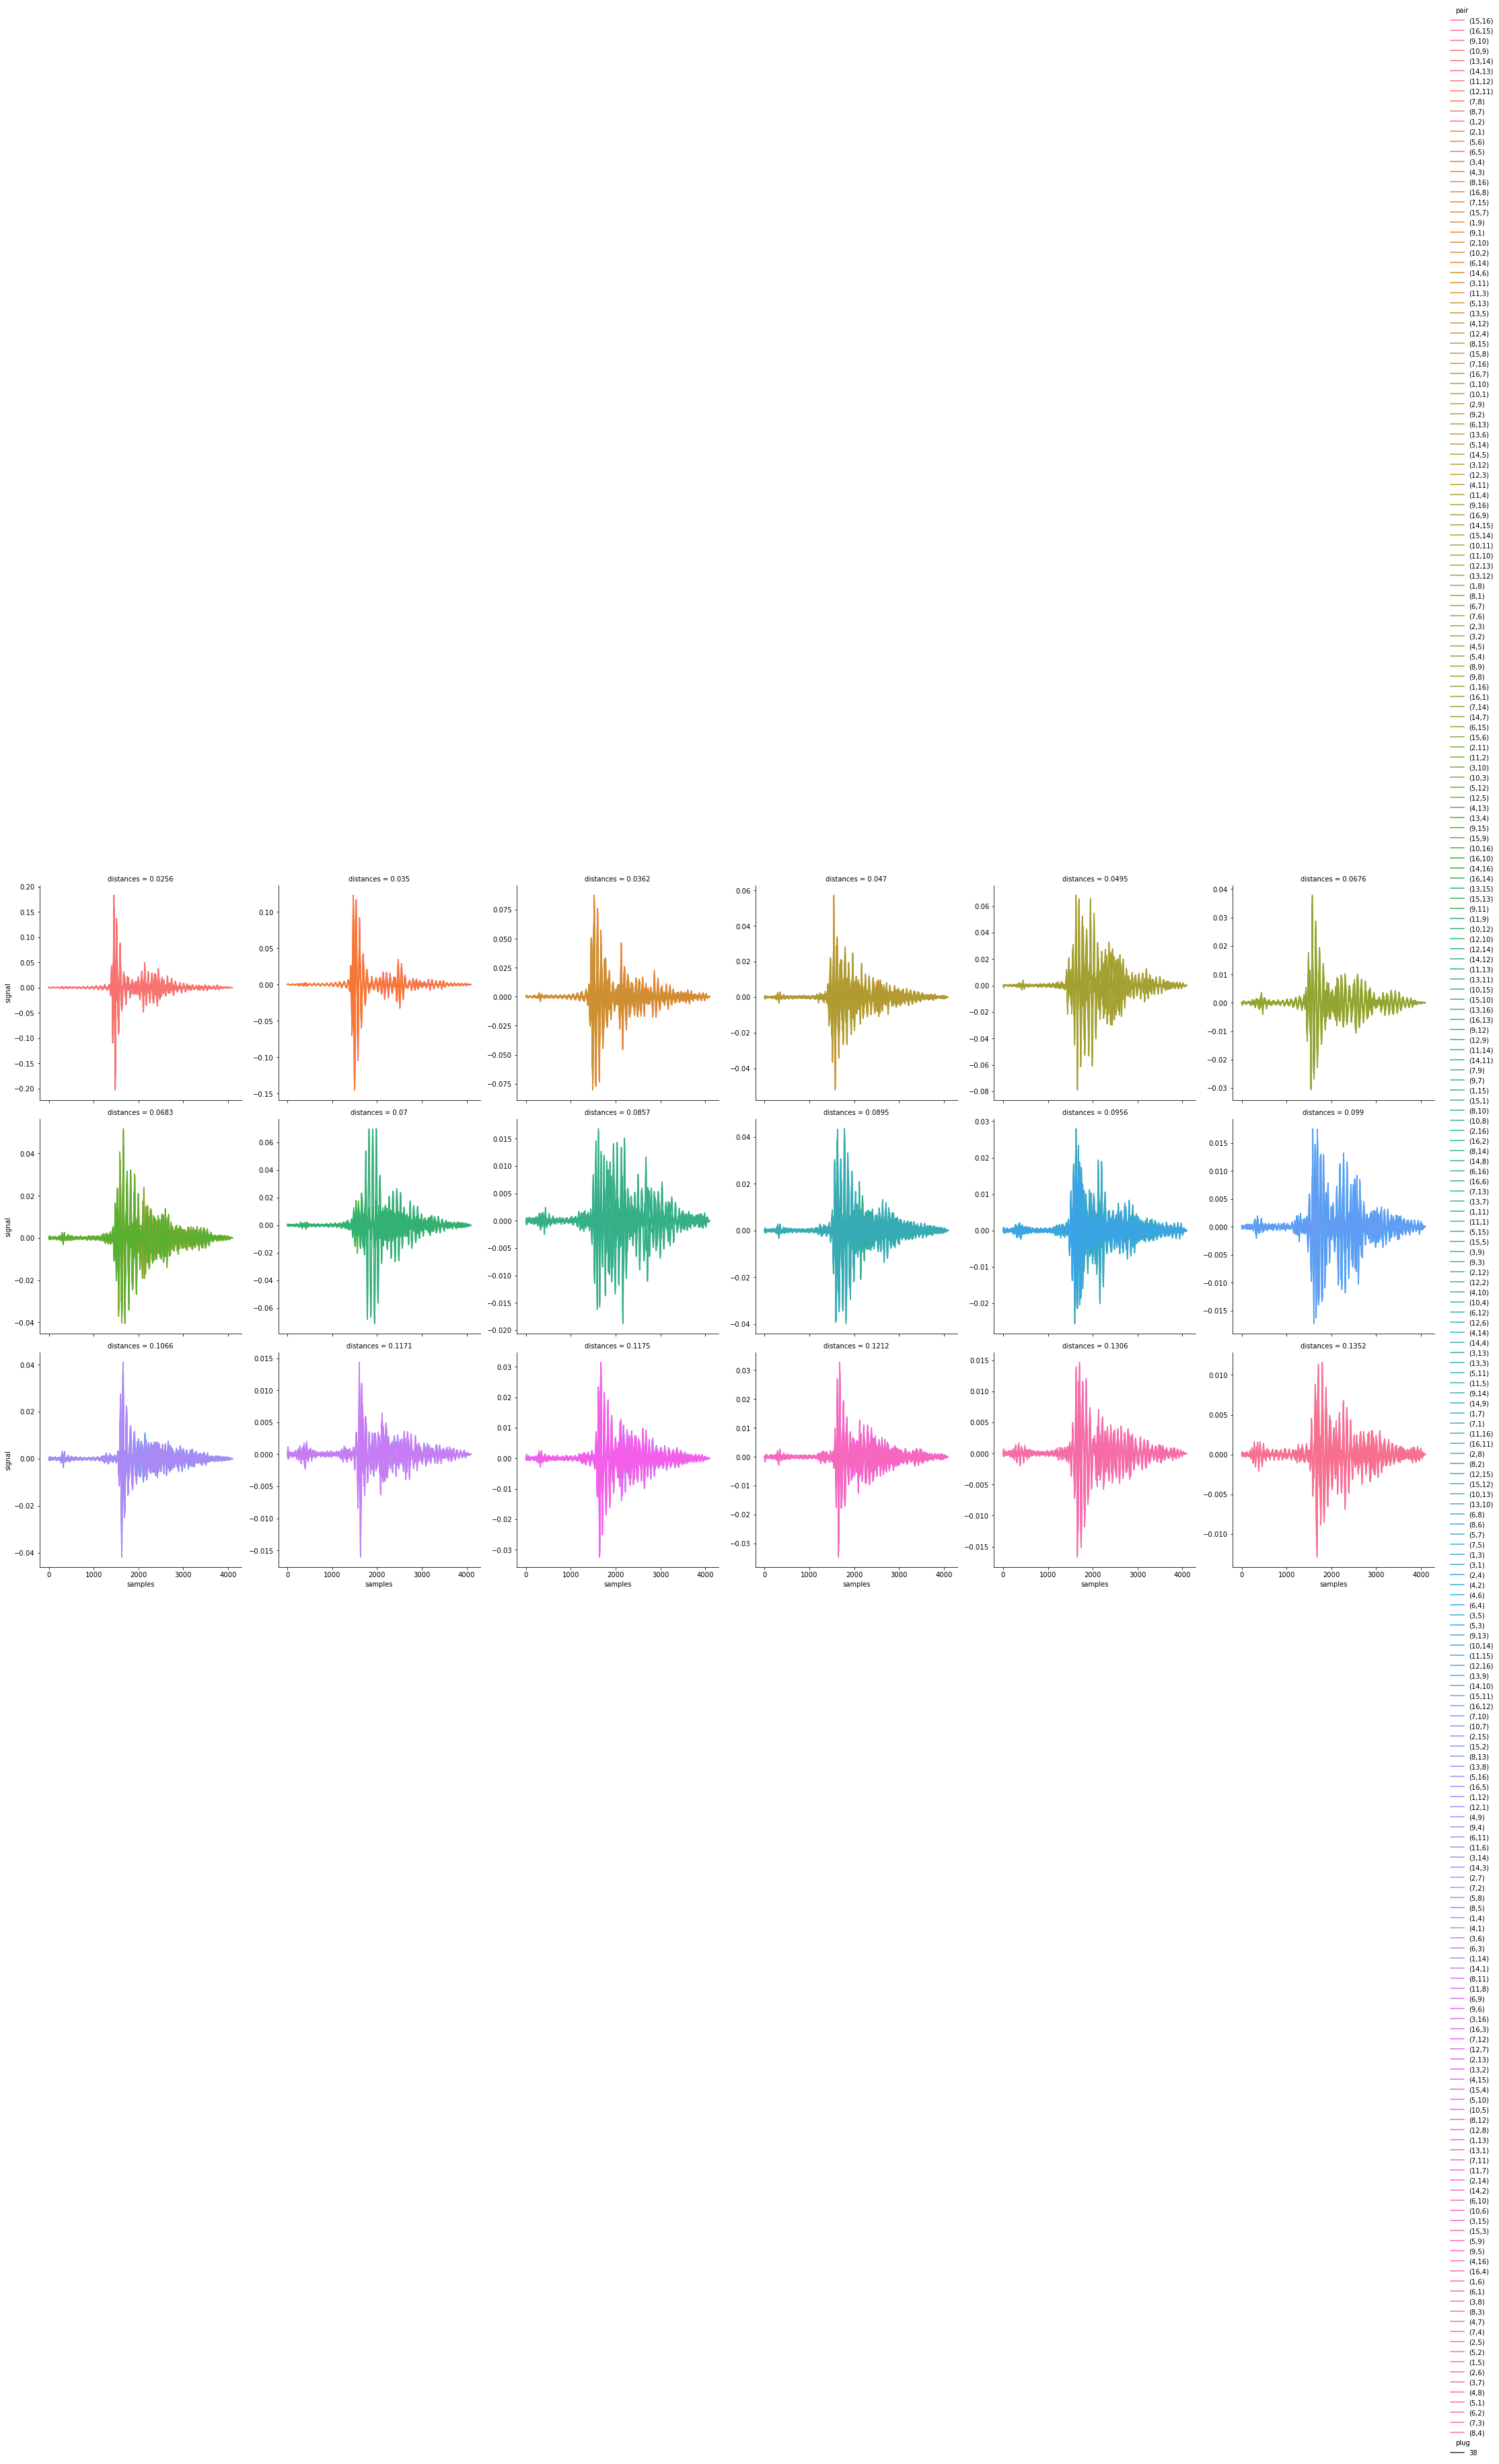

In [7]:
import seaborn as sns

g = sns.relplot(data=df2, x="samples", y="signal", hue="pair", size=None, style="plug", row=None, col='distances', col_wrap=6,
                row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, 
                style_order=None, legend='auto', kind='line', height=5, aspect=1, facet_kws={'sharey': False, 'sharex': True}, units=None)

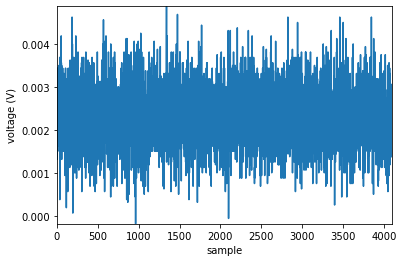

In [5]:
import matplotlib.pyplot as plt
# plt.style.use(['science','ieee', 'bright'])

fig, ax = plt.subplots()
ax.plot(df.loc[df.pair.eq('(1,6)'), 'samples'], df.loc[df.pair.eq('(1,6)'), 'raw_signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');


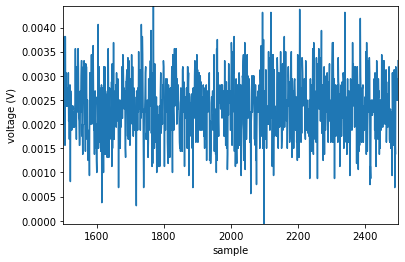

In [7]:
fig, ax = plt.subplots()
ax.plot(df.loc[df.pair.eq('(1,6)') & df.samples.between(1500, 2500), 'samples'], df.loc[df.pair.eq('(1,6)') & df.samples.between(1500, 2500), 'raw_signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');

In [7]:
scan = uwbproc.Scan_settings(phantom = 1, angle = 0, plug = 38, rep = 1, iter = 1, sampling_rate = 160e9, date = '2019-09-11', attRF = 0, HP_amp = 35, LNA_amp = 25, 
                        sig_names = ['raw_transmission', 'raw_signal'], obs = '')

In [13]:
df2 = uwbproc.uwb_filter_signals(df, input_col_names = ['raw_signal'], output_col_names = ['signal'], start_pt = None, nSamples = 1000)

file_title = f"{scan.date} Phantom {scan.phantom} Angle {scan.angle} Plug {scan.plug} Rep {scan.rep} Iter {scan.iter}"
file_path = "".join((out_path, "Processed/DF Filtered/", file_title, ".parquet"))
if not os.path.exists(os.path.dirname(file_path)):
    os.makedirs(os.path.dirname(file_path))

df2.to_parquet(file_path, engine='pyarrow', index= False)

  0%|          | 0/983040 [00:00<?, ?it/s]

In [8]:
df2 = _

In [10]:
file_title = f"{scan.date} Phantom {scan.phantom} Angle {scan.angle} Plug {scan.plug} Rep {scan.rep} Iter {scan.iter}"
file_path = "".join((out_path, "Processed/DF Filtered/", file_title, ".parquet"))
if not os.path.exists(os.path.dirname(file_path)):
    os.makedirs(os.path.dirname(file_path))

df2.to_parquet(file_path, engine='pyarrow', index= False)

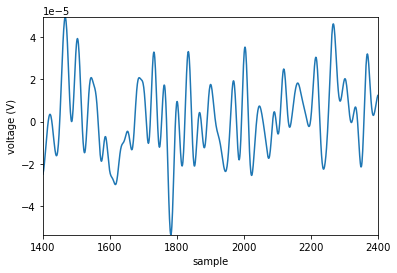

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df2.loc[df2.pair.eq('(1,6)') & df2.samples.between(1400, 2400), 'samples'], df2.loc[df2.pair.eq('(1,6)') & df2.samples.between(1400, 2400), 'signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');

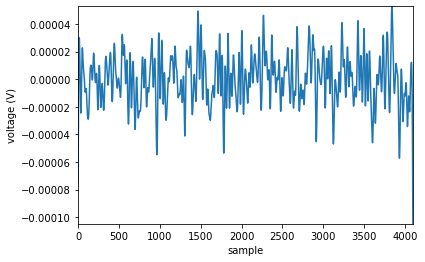

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df2.loc[df2.pair.eq('(1,6)'), 'samples'], df2.loc[df2.pair.eq('(1,6)'), 'signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');

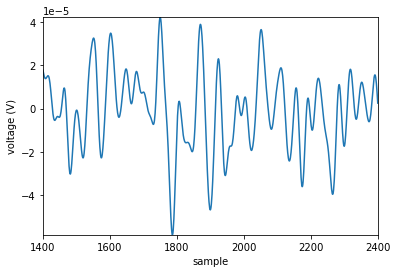

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df2.loc[df2.pair.eq('(1,2)') & df2.samples.between(1400, 2400), 'samples'], df2.loc[df2.pair.eq('(1,2)') & df2.samples.between(1400, 2400), 'signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');

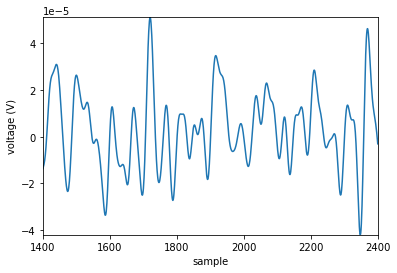

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df2.loc[df2.pair.eq('(1,5)') & df2.samples.between(1400, 2400), 'samples'], df2.loc[df2.pair.eq('(1,5)') & df2.samples.between(1400, 2400), 'signal']);
# ax.legend(title='Order')
ax.autoscale(tight=True);
ax.set(xlabel = 'sample', ylabel = 'voltage (V)');